In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# reading the csv file created 
df = pd.read_csv("ev_nepal_cars.csv")

In [78]:
df.head()

,Brand,Model,Battery_kWh,Motor_kW,Range_km,Price
0,BYD,Dolphin,44.9 kWh,70 kW,340 kms,"Rs. 41,15,000"
1,BYD,Atto 3,60.48 kWh,100 kW,420 kms,"Rs. 67,80,000"
2,Citroen,E-C3,29.2 kWh,42 kW,320 kms,"Rs. 35,99,000"
3,Dongfeng,Nammi 01,42.3 kWh,70 kW,317 kms,"Rs. 36,49,000"
4,XPENG,G6,66 kWh,190 kW,435 kms,"Rs. 84,99,000"


In [79]:
df.shape

(147, 6)

We have 147 rows of data and 6 columns

In [80]:
#changing the columns` to lower letter

df.columns = df.columns.str.lower()

In [81]:
df.head()

,brand,model,battery_kwh,motor_kw,range_km,price
0,BYD,Dolphin,44.9 kWh,70 kW,340 kms,"Rs. 41,15,000"
1,BYD,Atto 3,60.48 kWh,100 kW,420 kms,"Rs. 67,80,000"
2,Citroen,E-C3,29.2 kWh,42 kW,320 kms,"Rs. 35,99,000"
3,Dongfeng,Nammi 01,42.3 kWh,70 kW,317 kms,"Rs. 36,49,000"
4,XPENG,G6,66 kWh,190 kW,435 kms,"Rs. 84,99,000"


In [82]:
# Converting all entries to string, and removing Rs., commas, kWh, kW, kms from the data
df['price'] = df['price'].astype(str).str.replace('Rs.', '').str.replace(',', '')
df['battery_kwh'] = df['battery_kwh'].astype(str).str.replace(' kWh','')
df['motor_kw'] = df['motor_kw'].astype(str).str.replace(' kW','')
df['range_km'] = df['range_km'].astype(str).str.replace(' kms','')

df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['battery_kwh'] = pd.to_numeric(df['battery_kwh'], errors='coerce')
df['motor_kw'] = pd.to_numeric(df['motor_kw'], errors='coerce')
df['range_km'] = pd.to_numeric(df['range_km'], errors='coerce')

In [83]:
df.tail()

,brand,model,battery_kwh,motor_kw,range_km,price
142,Wuling,Air EV,17.3,30.0,200,2499000.0
143,Wuling,Air EV,26.7,30.0,300,3099000.0
144,Wuling,Binguo,31.9,50.0,330,3199000.0
145,Zeekr,X,66.0,315.0,400,15400000.0
146,Zeekr,X,66.0,200.0,440,6499000.0


In [84]:
# creating a column called import_tax_rate which is based on the motor size, this category is listed in the taxadvisor.com nepal
def map_import_tax(motor_kw):
    if motor_kw <= 50:
        return 10
    elif motor_kw <= 100:
        return 15
    elif motor_kw <= 150:
        return 30
    else:
        return 40
df['import_tax_rate'] = df['motor_kw'].apply(map_import_tax)


In [85]:
df.head()

,brand,model,battery_kwh,motor_kw,range_km,price,import_tax_rate
0,BYD,Dolphin,44.90,70.0,340,4115000.0,15
1,BYD,Atto 3,60.48,100.0,420,6780000.0,15
2,Citroen,E-C3,29.20,42.0,320,3599000.0,10
3,Dongfeng,Nammi 01,42.30,70.0,317,3649000.0,15
4,XPENG,G6,66.00,190.0,435,8499000.0,40


In [86]:
# putting price on the last column
cols = list(df.columns)
i,j = cols.index('price'), cols.index('import_tax_rate')
cols[i],cols[j] = cols[j],cols[i]
df= df[cols]

In [87]:
df.head()

,brand,model,battery_kwh,motor_kw,range_km,import_tax_rate,price
0,BYD,Dolphin,44.90,70.0,340,15,4115000.0
1,BYD,Atto 3,60.48,100.0,420,15,6780000.0
2,Citroen,E-C3,29.20,42.0,320,10,3599000.0
3,Dongfeng,Nammi 01,42.30,70.0,317,15,3649000.0
4,XPENG,G6,66.00,190.0,435,40,8499000.0


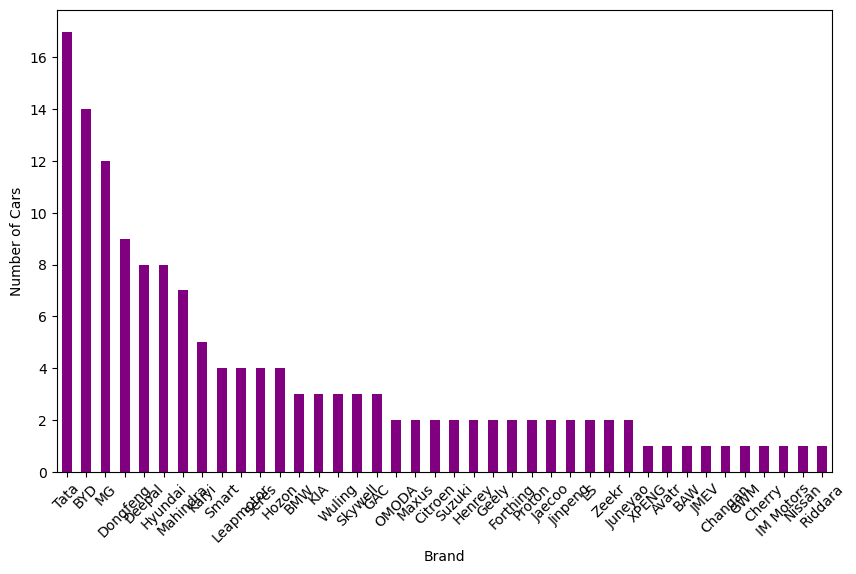

In [88]:
brand_counts = df['brand'].value_counts()

plt.figure(figsize=(10,6))
brand_counts.plot(kind='bar', color='purple')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
plt.show()

TATA seems to dominate followed by BYD

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12112\2566925344.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_models.values, y=top_models.index, palette = 'coolwarm', legend = False)


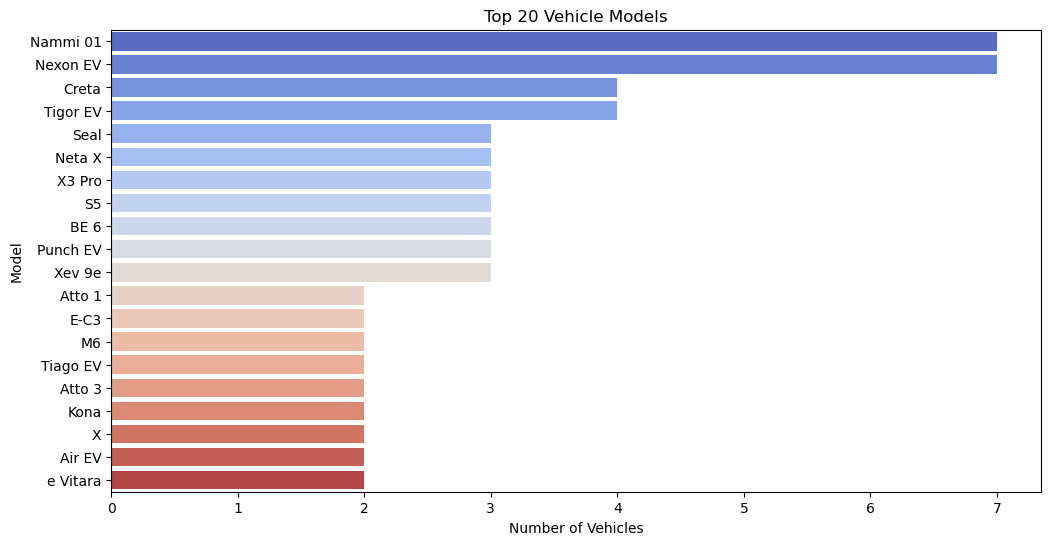

In [92]:
model_counts = df['model'].value_counts()
top_models = model_counts.head(20)
plt.figure(figsize=(12,6))
sns.barplot(x=top_models.values, y=top_models.index, palette = 'coolwarm', legend = False)
plt.xlabel('Number of Vehicles')
plt.ylabel('Model')
plt.title('Top 20 Vehicle Models')
plt.show()

TATA Nexon(TATA) and NAAMI(Dongfeng) seems to be at top 

In [13]:
# checking the null values
df.isnull().sum()

brand              0
model              0
battery_kwh        0
motor_kw           0
range_km           0
import_tax_rate    0
price              5
dtype: int64

5 of the rows donot have price

In [14]:
df[df['price'].isna()]

,brand,model,battery_kwh,motor_kw,range_km,import_tax_rate,price
8,Avatr,Avatr,0.0,0.0,0,10,NaN
23,BYD,Sealion 7,91.3,230.0,502,40,NaN
52,Henrey,Volts,0.0,0.0,0,10,NaN
125,Suzuki,e Vitara,49.0,106.0,346,30,NaN
126,Suzuki,e Vitara,61.0,128.0,428,30,NaN


In [15]:
#removing the rows with no motor and range values:
# the prices are listed in the website but they have been cut and new offer is listed 
df = df.drop([8, 52], axis =0)

In [16]:
df[df['price'].isna()]

,brand,model,battery_kwh,motor_kw,range_km,import_tax_rate,price
23,BYD,Sealion 7,91.3,230.0,502,40,NaN
125,Suzuki,e Vitara,49.0,106.0,346,30,NaN
126,Suzuki,e Vitara,61.0,128.0,428,30,NaN


In [17]:
# added the price manually from the website
df.loc[23, 'price'] = 7299000
df.loc[125,'price'] = 2000000
df.loc[126,'price'] = 2000000

In [18]:
df.isnull().sum()

brand              0
model              0
battery_kwh        0
motor_kw           0
range_km           0
import_tax_rate    0
price              0
dtype: int64

In [19]:
#checking datatype of each columns
df.dtypes

brand               object
model               object
battery_kwh        float64
motor_kw           float64
range_km             int64
import_tax_rate      int64
price              float64
dtype: object

Brand and Model are to be treated differently maybe label encoding

In [20]:
#checking for duplicate values
df.duplicated().sum()

np.int64(1)

In [21]:
duplicated_rows =  df[df.duplicated(keep=False)]
print(duplicated_rows)

     brand model  battery_kwh  motor_kw  range_km  import_tax_rate      price
32  Deepal   S07         66.8      99.0       410               15  7499000.0
33  Deepal   S07         66.8      99.0       410               15  7499000.0


In [22]:
# keeping one
df = df.drop_duplicates(keep='first')

In [23]:
df.shape

(144, 7)

In [24]:
df.head()

,brand,model,battery_kwh,motor_kw,range_km,import_tax_rate,price
0,BYD,Dolphin,44.90,70.0,340,15,4115000.0
1,BYD,Atto 3,60.48,100.0,420,15,6780000.0
2,Citroen,E-C3,29.20,42.0,320,10,3599000.0
3,Dongfeng,Nammi 01,42.30,70.0,317,15,3649000.0
4,XPENG,G6,66.00,190.0,435,40,8499000.0


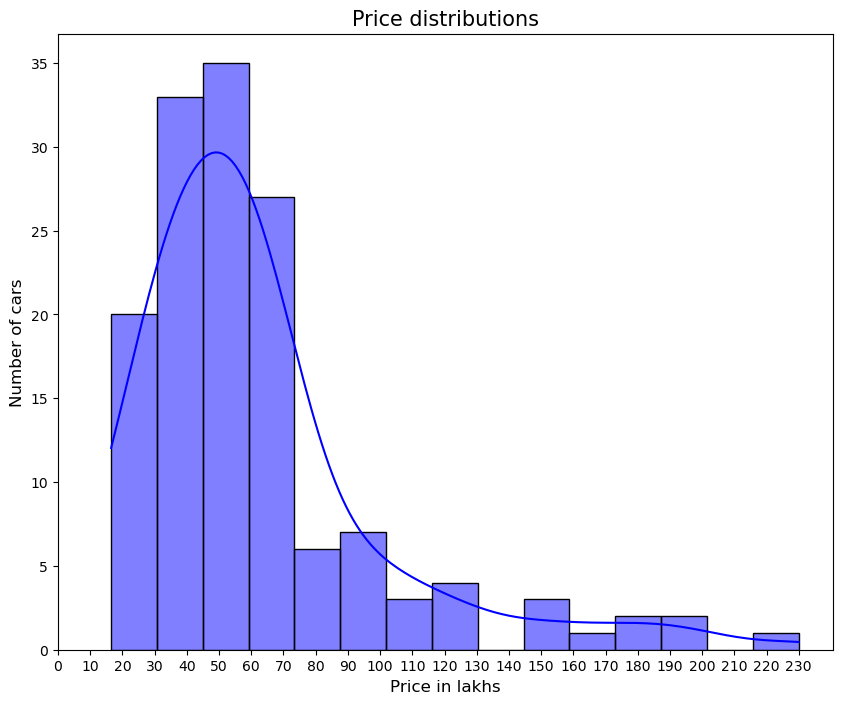

In [25]:
# plotting how price is distributed 
# the price is a number, converting it to lakhs
df['price_in_lakhs'] = df['price'] / 1e5

plt.figure(figsize=(10,8))
sns.histplot(df['price_in_lakhs'], bins =15, kde=True, color='blue')
plt.xlabel("Price in lakhs", fontsize =12)
plt.ylabel("Number of cars", fontsize=12)
plt.title("Price distributions", fontsize=15)

plt.xticks(np.arange(0, df['price_in_lakhs'].max() +10, 10))
plt.show()

Most of the cars fall in the range of 30 to 60 lakhs

In [26]:
# maximum priced car features
max_idx = df['price'].idxmax() #index of the row with maximum price
max_price_row = df.loc[max_idx]
print(max_price_row)

brand                     BMW
model                     iX3
battery_kwh              80.0
motor_kw                210.0
range_km                  460
import_tax_rate            40
price              22996000.0
price_in_lakhs         229.96
Name: 12, dtype: object


In [27]:
max_idx = df['motor_kw'].idxmax() #index of the row with maximum motor size
max_motor_row = df.loc[max_idx]
print(max_motor_row)

brand                  Deepal
model                     E07
battery_kwh              90.0
motor_kw                440.0
range_km                  490
import_tax_rate            40
price              19999000.0
price_in_lakhs         199.99
Name: 28, dtype: object


In [28]:
max_idx = df['range_km'].idxmax() #index of the row with maximum range
max_range_row = df.loc[max_idx]
print(max_range_row)

brand               Mahindra
model                 Xev 9e
battery_kwh             59.0
motor_kw                99.0
range_km                 656
import_tax_rate           15
price              6750000.0
price_in_lakhs          67.5
Name: 90, dtype: object


Important metric as customer value each category differently

In [29]:
# checking the median price 
median_price = df['price'].median()
print(f"Median price of thr car is: {median_price}")
print(f"In lakhs: {median_price / 1e5} lakhs ")

Median price of thr car is: 5399500.0
In lakhs: 53.995 lakhs 


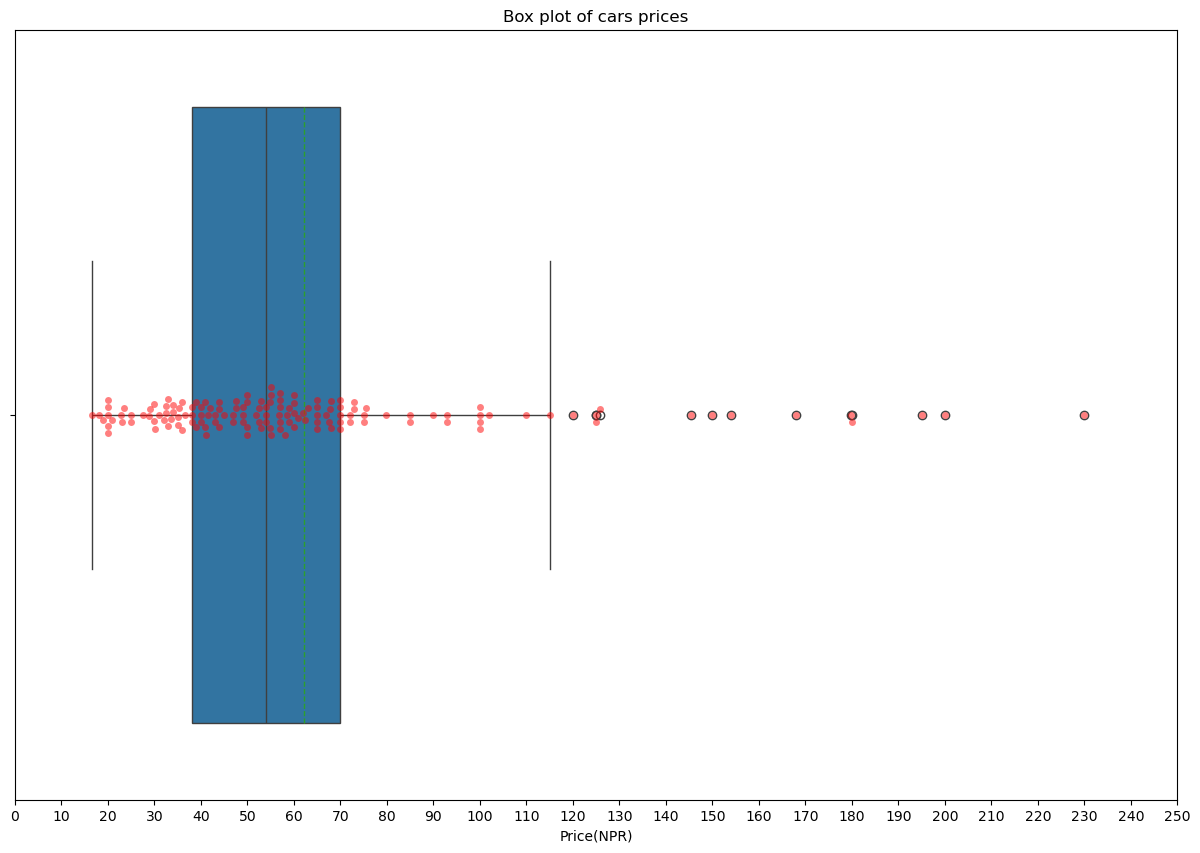

In [30]:
# box plot to see outliers and other metrics

plt.figure(figsize=(15,10))
sns.boxplot(x=df['price_in_lakhs'], showmeans = True, meanline = True)
sns.swarmplot(x=df['price_in_lakhs'], color = 'red', alpha=0.5)
plt.title("Box plot of cars prices")
plt.locator_params(axis='x', nbins=30)
plt.xlabel("Price(NPR)")
plt.xlim(0,250)
plt.show()

In [31]:
# looking at the outlier values beyond 1.5 * IQR 
Q1 = df['price_in_lakhs'].quantile(0.25)
Q3 = df['price_in_lakhs'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['price_in_lakhs'] < Q1 - 1.5*IQR) | (df['price_in_lakhs'] > Q3 + 1.5*IQR)]
print(outliers[['price_in_lakhs','brand','model','price']])

     price_in_lakhs   brand      model       price
10           149.96     BMW        iX1  14996000.0
11           179.96     BMW        iX2  17996000.0
12           229.96     BMW        iX3  22996000.0
20           145.50     BYD       Seal  14550000.0
21           195.00     BYD       Seal  19500000.0
28           199.99  Deepal        E07  19999000.0
78           125.90     KIA        EV6  12590000.0
79           179.90     KIA        EV9  17990000.0
95           125.00   Maxus     MIFA 7  12500000.0
98           168.00      MG  Cyberster  16800000.0
122          120.00   Smart         #1  12000000.0
124          125.00   Smart         #3  12500000.0
145          154.00   Zeekr          X  15400000.0


we have 12 outliers, we can modify them later to increase accuracy, maybe drop them 

In [32]:
#df = df.rename(columns={'price': 'price_in_rs'})

Encoding, label encoder tool in scikit-learn converts the categorical labels into numeric values, giving unique values (integers)

In [33]:
from sklearn.preprocessing import LabelEncoder
# brand and model are categorical data --> string, hence converting them to number is necesssary 
# feed them into the model
le = LabelEncoder()

df['brand'] = le.fit_transform(df['brand'])
df['brand'] = df['brand'].astype('category')

df['model'] = le.fit_transform(df['model'])
df['model'] = df['model'].astype('category')

In [34]:
df.dtypes

brand              category
model              category
battery_kwh         float64
motor_kw            float64
range_km              int64
import_tax_rate       int64
price               float64
price_in_lakhs      float64
dtype: object

In [35]:
# the datatypes of brand and model is changed while the values are integer
df.head() 

,brand,model,battery_kwh,motor_kw,range_km,import_tax_rate,price,price_in_lakhs
0,2,19,44.90,70.0,340,15,4115000.0,41.15
1,2,8,60.48,100.0,420,15,6780000.0,67.80
2,5,20,29.20,42.0,320,10,3599000.0,35.99
3,7,47,42.30,70.0,317,15,3649000.0,36.49
4,37,29,66.00,190.0,435,40,8499000.0,84.99


In [36]:
# create X and y variable to train
X = df.iloc[:, 0:6]
y = df.price_in_lakhs

In [37]:
y

0       41.15
1       67.80
2       35.99
3       36.49
4       84.99
        ...  
142     24.99
143     30.99
144     31.99
145    154.00
146     64.99
Name: price_in_lakhs, Length: 144, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.05, random_state=42)

In [39]:
len(y_test)

8

__RandomForest__

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

model = RandomForestRegressor(
    n_estimators = 500,
    max_features = 4,
    max_samples = 110,
    oob_score = True,
    random_state = 42
)
rf = model.fit(X_train, y_train)

In [41]:
rf

RandomForestRegressor(max_features=4, max_samples=110, n_estimators=500,
                      oob_score=True, random_state=42)

In [42]:
print(f"Out of bag samples score :{rf.oob_score_}")

Out of bag samples score :0.7355911978102996


Meaning ~ model explains 73.5% of the variance in price on unseen data (out of the bag samples)

<Axes: >

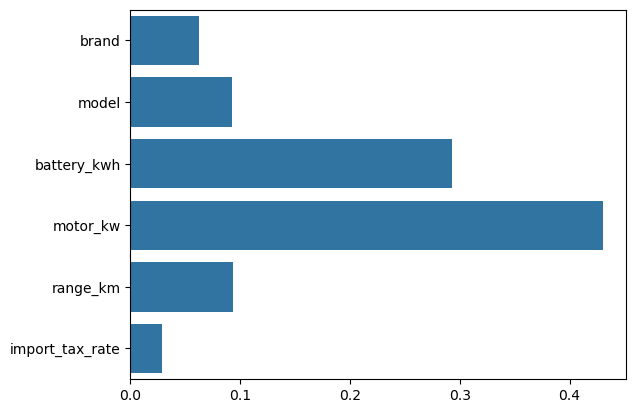

In [43]:
sns.barplot(x= rf.feature_importances_, y=rf.feature_names_in_)

How much each feature contributed to reducing the prediction error across all trees. Random forest relied most on the motor power to predict the price.

In [44]:
# predicting price using test data
pred_price = rf.predict(X_test)
y_test

120    115.00
20     145.50
85      61.95
100     49.99
59      56.96
13      28.95
135     37.99
68      18.99
Name: price_in_lakhs, dtype: float64

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
mae = mean_absolute_error(y_true = y_test,y_pred= pred_price)
print(f"MAE:{mae}")
mse = mean_squared_error(y_true=y_test,y_pred = pred_price)
rmse = math.sqrt(mse)
print(f"RMSE: {rmse}")
r2 = r2_score(y_test, pred_price)
print(f"R2-score: {r2}")

MAE:7.3147655644782805
RMSE: 9.292636782890929
R2-score: 0.9485335993601864


On average the absolute difference between predicted and true prices is ~ 7.3 lakhs.
RMSE - square of error hence penalizes more to the outliers, some predictions are off by more than ~9.29 lakhs
Since RMSE>MAE, means we have few big errors/outliers

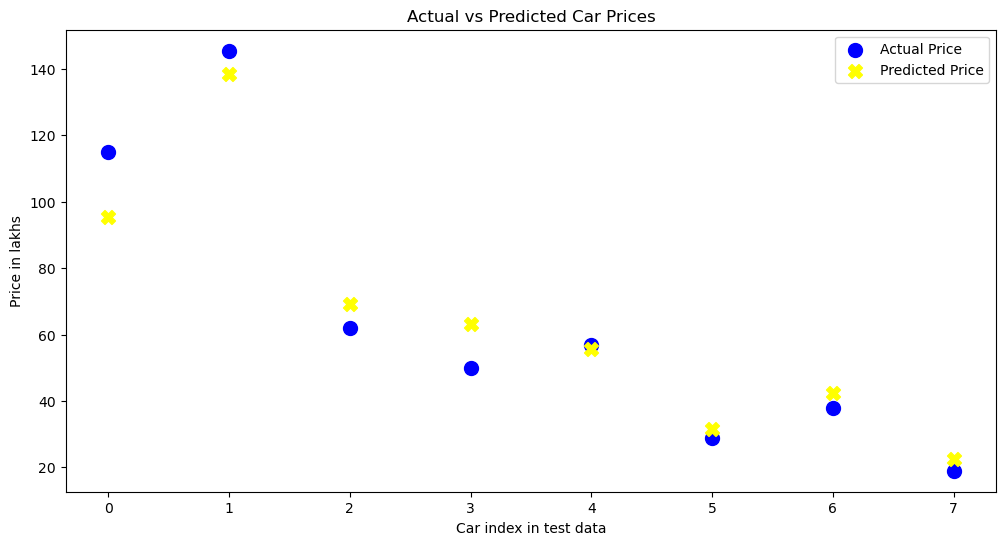

In [46]:
x = np.arange(len(y_test))
plt.figure(figsize=(12,6))
plt.scatter(x, y_test, color='blue', label='Actual Price', s=100)
plt.scatter(x, pred_price, color='yellow', label='Predicted Price', s=100, marker='X')
plt.xlabel("Car index in test data")
plt.ylabel("Price in lakhs")
plt.title("Actual vs Predicted Car Prices")
plt.legend()
plt.show()

Observation can lead us to conclude that the prediction error is large for the car with higher price. 

In [47]:
# first iteration, Removing top 5 outliers
# the top outliers are
top_outliers = list(df.price_in_lakhs.sort_values()[-5:].index)
top_outliers

[79, 11, 21, 28, 12]

In [48]:
idx = [79, 11, 21, 28, 12]
df1 = df.drop(idx, axis=0)

__RandomForestwithlessoutliers__

In [49]:
df1.shape

(139, 8)

In [50]:
# let's train again
# create X and y variable to train
X1 = df1.iloc[:, 0:6]
y1 = df1.price_in_lakhs

In [51]:
X1

,brand,model,battery_kwh,motor_kw,range_km,import_tax_rate
0,2,19,44.90,70.0,340,15
1,2,8,60.48,100.0,420,15
2,5,20,29.20,42.0,320,10
3,7,47,42.30,70.0,317,15
4,37,29,66.00,190.0,435,40
...,...,...,...,...,...,...
142,36,5,17.30,30.0,200,10
143,36,5,26.70,30.0,300,10
144,36,12,31.90,50.0,330,10
145,38,66,66.00,315.0,400,40


In [52]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1, test_size = 0.05, random_state=42)

In [53]:
len(X_train1)

132

In [54]:
model1 = RandomForestRegressor(
    n_estimators = 500, 
    max_features = 4, 
    max_samples = 105,
    oob_score = True,
    random_state = 42,
)
rf1 = model1.fit(X_train1, y_train1)

In [55]:
rf1

RandomForestRegressor(max_features=4, max_samples=105, n_estimators=500,
                      oob_score=True, random_state=42)

In [56]:
print(f"Out of bag samples score :{rf1.oob_score_}")

Out of bag samples score :0.6724503105741464


In [57]:
pred_price1 = rf.predict(X_test1)
y_test1

143    30.99
73     20.96
37     32.99
126    20.00
48     54.99
15     56.90
58     54.96
Name: price_in_lakhs, dtype: float64

In [58]:
pred_price1

array([28.55586924, 22.08381533, 31.88881357, 46.06386333, 61.01392   ,
       53.28503333, 55.72369524])

In [59]:
mae = mean_absolute_error(y_true = y_test1 ,y_pred= pred_price1)
print(f"MAE:{mae}")
mse = mean_squared_error(y_true = y_test1, y_pred = pred_price1)
rmse = math.sqrt(mse)
print(f"RMSE: {rmse}")
r2 = r2_score(y_test1, pred_price1)
print(f"R2-score: {r2}")

MAE:5.875082537414989
RMSE: 10.265506482966877
R2-score: 0.5438983116029175


__R^2 value decreased on the removal of the outliers, because the model's residuals didn't decrease proportioanlly, R2 = 1- SSres/SStot__

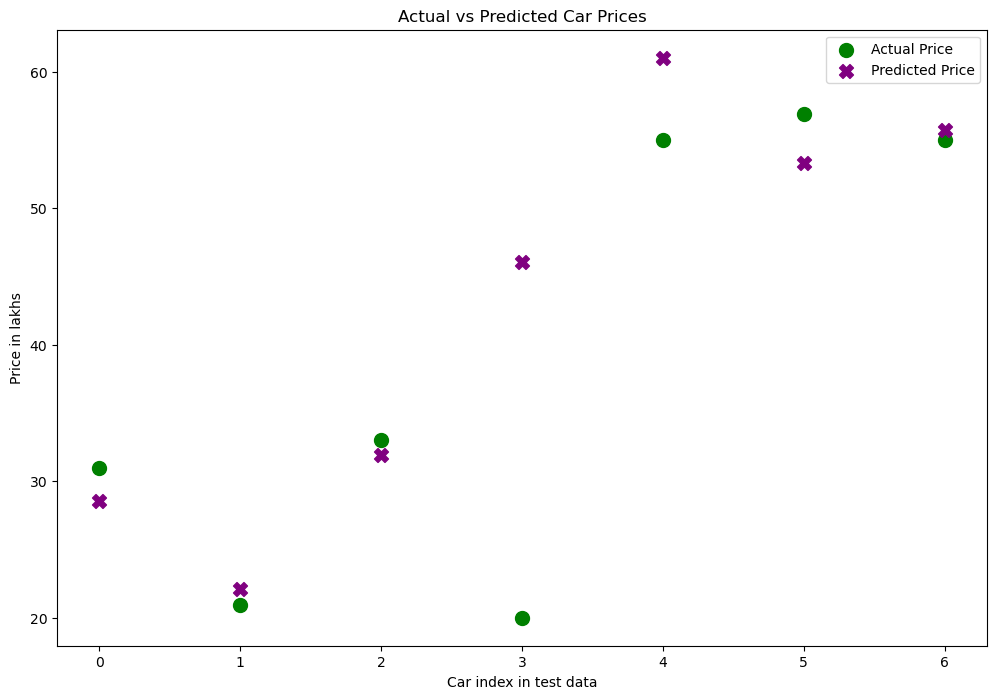

In [60]:
x = np.arange(len(y_test1))
plt.figure(figsize=(12,8))
plt.scatter(x, y_test1, color='green', label='Actual Price', s=100)
plt.scatter(x, pred_price1, color='purple', label='Predicted Price', s=100, marker='X')
plt.xlabel("Car index in test data")
plt.ylabel("Price in lakhs")
plt.title("Actual vs Predicted Car Prices")
plt.legend()
plt.show()

we have succesfully removed the effects of the outlier which is showcased by the RMSE and MAE error value. It has decreased by 5 lakhs

__Linear Regression__

Performing this regression on the data where top 5 outliers are removed

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()

model3 = lr.fit(X_train1, y_train1)

In [62]:
pred_lr = lr.predict(X_test1)

In [63]:
mae_lr = mean_absolute_error(y_test1, pred_lr)
rmse_lr = math.sqrt(mean_squared_error(y_test1, pred_lr))
r2_lr = r2_score(y_test1, pred_lr)

print("Linear Regression:")
print("MAE: ", mae_lr)
print("RMSE: ", rmse_lr)
print("R^2: ", r2_lr)

Linear Regression:
MAE:  12.485272720316582
RMSE:  19.616808973580323
R^2:  -0.6655498768928909


In [64]:
# poor performance as the model cannot capture non-linearity in the data.
# we can see this by pairplot

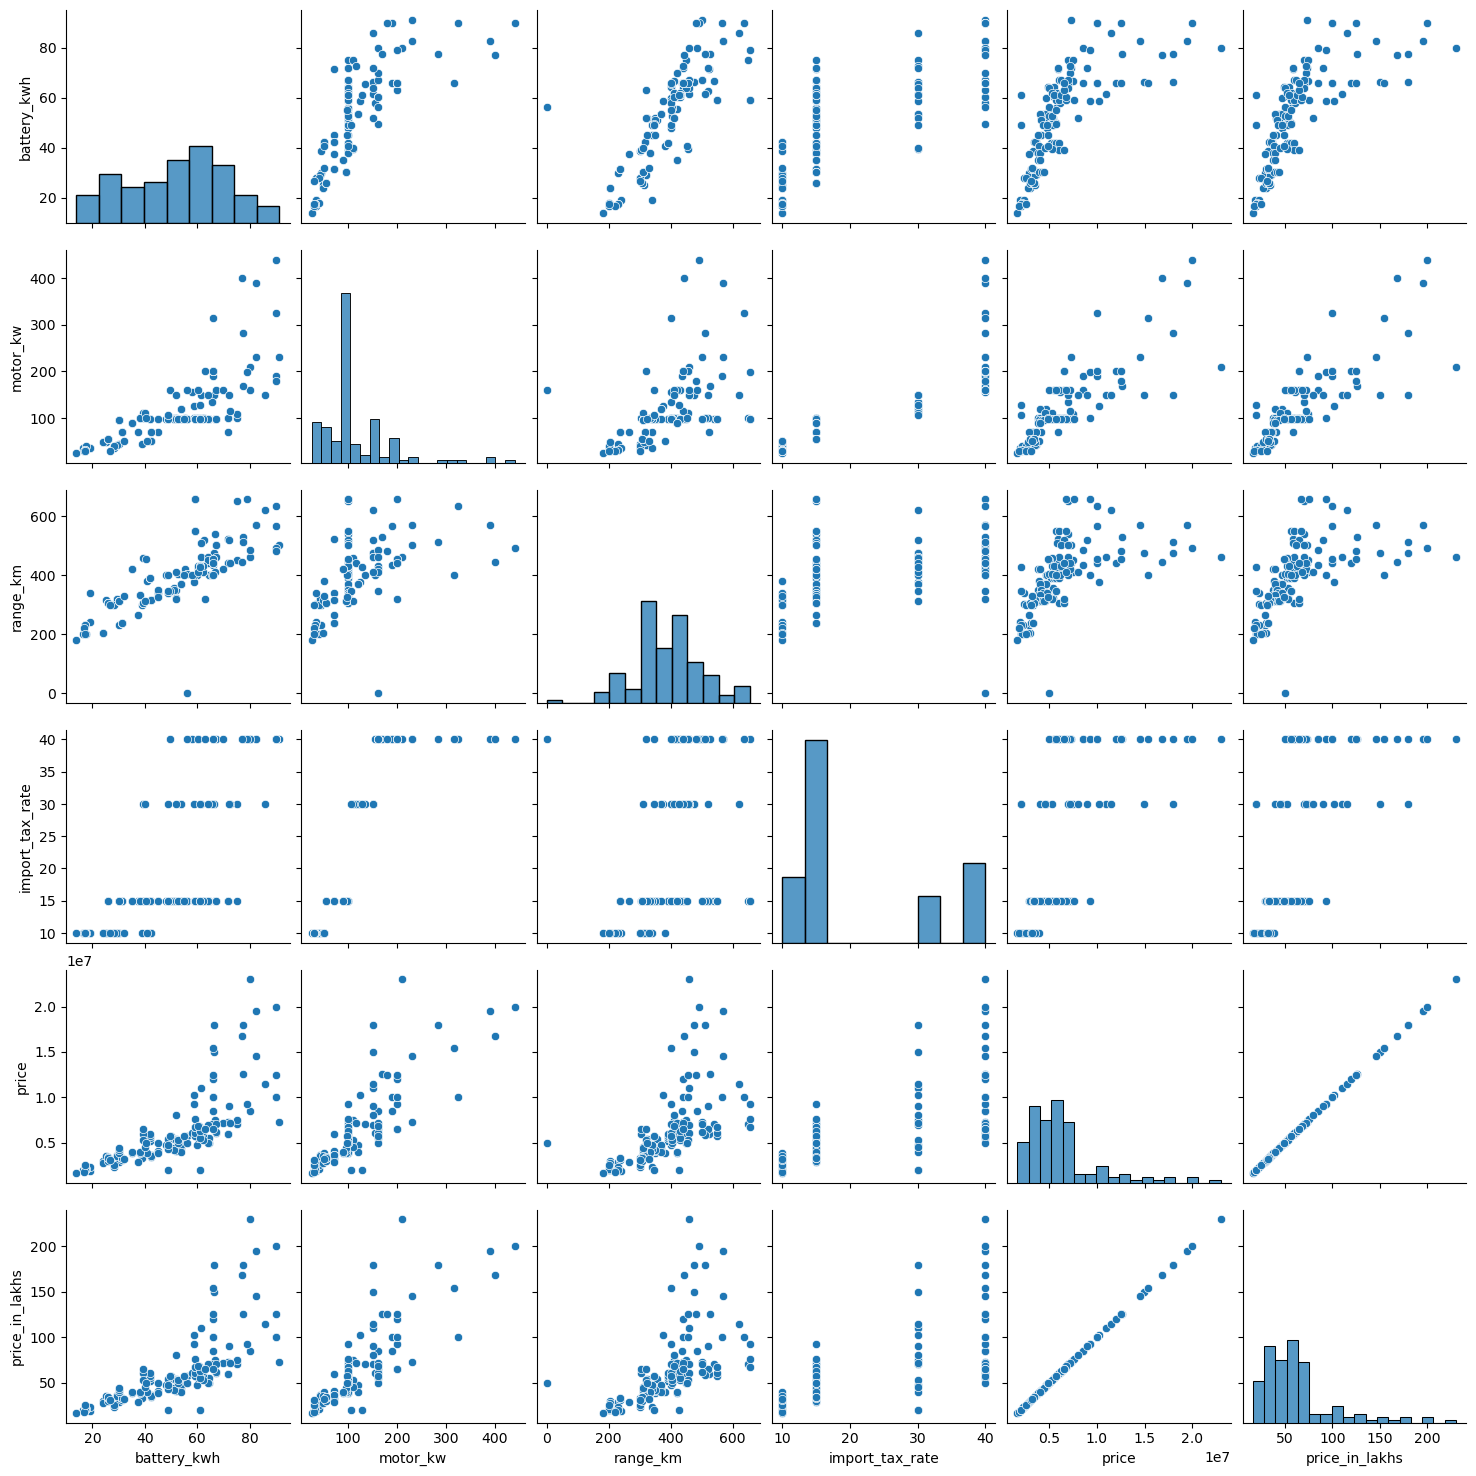

In [65]:
sns.pairplot(df)

example: price and motor plot donot have a linear relation as the price is affected by range and other factors too. fitting a linear line to the data doesn't seem to be good, this is the reason we have negative R^2 score

__RidgeRegression__

The predictors are coorelated to each other. Ridge regression works by attempting at increasing the bias to improve variance (generalization capabilities). The model might perform worse on the training dataset but it will perform consistently on the both training and testing dataset. We add alpha * slope^2 to the sum of squared residuals. alpha is the parameter that can be tuned. more alpha, the slope decreases.

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test1)

In [67]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.0001)
ridge.fit(X_train_scaled, y_train1)

Ridge(alpha=0.0001)

In [68]:
y_pred_r = ridge.predict(X_test_scaled)

mae = mean_absolute_error(y_test1, y_pred_r)
rmse = np.sqrt(mean_squared_error(y_test1, y_pred_r))
r2 = r2_score(y_test1,y_pred_r)

In [69]:
print("Ridge Regression:")
print("MAE:", mae)
print("RMSE: ", rmse)
print("R2 score: ", r2)

Ridge Regression:
MAE: 12.485267952584099
RMSE:  19.61682087915244
R2 score:  -0.6655518985601476


__Polynomial Ridge Regression__

Polynomial features + Ridge Regression, to capture non-linear relationship, polynomial relation is used and to avoid overfitting, L2 penalty(ridge regression) was kept

In [70]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_ridge = Pipeline([
    ('poly', PolynomialFeatures(degree = 4, include_bias = False)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha = 1))
])


In [71]:
poly_ridge.fit(X_train1, y_train1)

Pipeline(steps=[('poly', PolynomialFeatures(degree=4, include_bias=False)),
                ('scaler', StandardScaler()), ('ridge', Ridge(alpha=1))])

In [72]:
y_pred_pipe = poly_ridge.predict(X_test1)

mae = mean_absolute_error(y_test1, y_pred_pipe)
rmse = np.sqrt(mean_squared_error(y_test1, y_pred_pipe))
r2 = r2_score(y_test1, y_pred_pipe)


In [73]:
print("Polynomial Ridge:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


Polynomial Ridge:
MAE: 8.959352122598949
RMSE: 12.369968204827112
R²: 0.3377254238152242


Seems like a dead end as only random forest can capture the non-linearity of the inputs on the price

Table of all the mae, rmse value fromm different algorithm. The less amount of data is also a big reason for low performance

In [74]:
results = pd.DataFrame({
    'Model' : [
        'Linear Regression',
        'Ridge Regression',
        'Polynomial Ridge(d=4)',
        'Random Forest',
        'Random Forest(less outliers)'
    ],
    'MAE (lakhs)' : [
        12.485,
        12.4,
        8.959,
        7.314,
        5.875
    ],
    'RMSE (lakhs)': [
        19.61,
        19.6,
        12.36,
        9.29,
        10.26,
    ],
    'R² Score' : [
        -0.666,
        -0.65,
         0.338,
         0.948,
         0.54
    ]
})  

results

,Model,MAE (lakhs),RMSE (lakhs),R² Score
0,Linear Regression,12.485,19.61,-0.666
1,Ridge Regression,12.400,19.60,-0.650
2,Polynomial Ridge(d=4),8.959,12.36,0.338
3,Random Forest,7.314,9.29,0.948
4,Random Forest(less outliers),5.875,10.26,0.540


Random Forest metric is the best as the mean absolute error is the least. 

The R^2 value is how much of the variance is explained by the model and it is highest in the random forest regressor